# Install and import dependencies

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_profiling import ProfileReport

In [4]:
# pip install pandas-profiling

In [5]:
# pip install openpyxl

In [6]:
%matplotlib inline

# EDA

In [7]:
ls

 Volume in drive C has no label.
 Volume Serial Number is 40F4-F4CD

 Directory of C:\Users\DELL\Documents\Bryan\Rakamin\Final Project

07/02/2022  15:50    <DIR>          .
07/02/2022  15:50    <DIR>          ..
05/02/2022  14:57    <DIR>          .ipynb_checkpoints
26/01/2021  10:20           555.610 E Commerce Dataset.xlsx
27/01/2022  22:55    <DIR>          Guidance
06/02/2022  19:53           339.028 Homework v2.0 - EDA.pdf
07/02/2022  13:15         7.933.968 Laporan Final Project - Ghoib CC.pptx
27/01/2022  18:35         7.844.126 output.html
06/02/2022  19:21         1.928.073 Stage 0 - Notulen Mentoring.pptx
29/01/2022  22:30            13.231 Stage 0.ipynb
06/02/2022  21:10         1.928.454 Stage 1 - Notulen Mentoring.pptx
07/02/2022  15:50         1.862.557 Stage 1.ipynb
06/02/2022  19:14         1.927.608 Stage X - Notulen Mentoring.pptx
05/02/2022  15:13               697 Untitled.ipynb
              10 File(s)     24.333.352 bytes
               4 Dir(s)  265.761.947.648 

In [8]:
df = pd.read_excel('E Commerce Dataset.xlsx', sheet_name='E Comm')

In [9]:
df.head(3)

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

In [9]:
df.isna().sum()

CustomerID                       0
Churn                            0
Tenure                         264
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                251
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 255
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
CashbackAmount                   0
dtype: int64

In [33]:
cat = []
num = []

for col in df.columns:
    if df[col].dtype ==  'O':
        cat.append(col)
    else:
        num.append(col)

In [11]:
df[num].describe()

,CustomerID,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
count,5630.000000,5630.000000,5366.000000,5630.000000,5379.000000,5375.000000,5630.000000,5630.000000,5630.000000,5630.000000,5365.000000,5374.000000,5372.000000,5323.000000,5630.000000
mean,52815.500000,0.168384,10.189899,1.654707,15.639896,2.931535,3.688988,3.066785,4.214032,0.284902,15.707922,1.751023,3.008004,4.543491,177.223030
std,1625.385339,0.374240,8.557241,0.915389,8.531475,0.721926,1.023999,1.380194,2.583586,0.451408,3.675485,1.894621,2.939680,3.654433,49.207036
min,50001.000000,0.000000,0.000000,1.000000,5.000000,0.000000,1.000000,1.000000,1.000000,0.000000,11.000000,0.000000,1.000000,0.000000,0.000000
25%,51408.250000,0.000000,2.000000,1.000000,9.000000,2.000000,3.000000,2.000000,2.000000,0.000000,13.000000,1.000000,1.000000,2.000000,145.770000
50%,52815.500000,0.000000,9.000000,1.000000,14.000000,3.000000,4.000000,3.000000,3.000000,0.000000,15.000000,1.000000,2.000000,3.000000,163.280000
75%,54222.750000,0.000000,16.000000,3.000000,20.000000,3.000000,4.000000,4.000000,6.000000,1.000000,18.000000,2.000000,3.000000,7.000000,196.392500
max,55630.000000,1.000000,61.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,26.000000,16.000000,16.000000,46.000000,324.990000


In [12]:
df[cat].describe()

,PreferredLoginDevice,PreferredPaymentMode,Gender,PreferedOrderCat,MaritalStatus
count,5630,5630,5630,5630,5630
unique,3,7,2,6,3
top,Mobile Phone,Debit Card,Male,Laptop & Accessory,Married
freq,2765,2314,3384,2050,2986


In [13]:
df['PreferredPaymentMode'].value_counts()

Debit Card          2314
Credit Card         1501
E wallet             614
UPI                  414
COD                  365
CC                   273
Cash on Delivery     149
Name: PreferredPaymentMode, dtype: int64

In [14]:
df['PreferedOrderCat'].value_counts()

Laptop & Accessory    2050
Mobile Phone          1271
Fashion                826
Mobile                 809
Grocery                410
Others                 264
Name: PreferedOrderCat, dtype: int64

In [63]:
df[df['OrderAmountHikeFromlastYear'].isna()]

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
10,50011,1,4.0,Mobile Phone,1,18.0,Cash on Delivery,Female,2.0,3,Others,3,Divorced,2,0,NaN,9.0,15.0,8.0,295.45
40,50041,0,23.0,Mobile Phone,1,17.0,Debit Card,Female,2.0,3,Others,4,Single,4,0,NaN,2.0,4.0,4.0,299.26
65,50066,0,25.0,Mobile Phone,1,6.0,Debit Card,Male,3.0,4,Others,3,Divorced,1,0,NaN,1.0,11.0,9.0,299.99
106,50107,0,15.0,Mobile Phone,1,10.0,Cash on Delivery,Male,2.0,3,Others,2,Divorced,2,0,NaN,0.0,11.0,15.0,292.32
108,50109,0,23.0,Mobile Phone,3,6.0,Credit Card,Female,3.0,3,Others,2,Married,4,0,NaN,1.0,1.0,6.0,295.17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5534,55535,0,61.0,Mobile Phone,3,28.0,Debit Card,Female,4.0,4,Grocery,1,Married,6,1,NaN,1.0,2.0,1.0,303.75
5537,55538,0,23.0,Computer,1,9.0,Debit Card,Male,3.0,4,Others,1,Married,5,0,NaN,5.0,5.0,4.0,316.61
5561,55562,0,29.0,Mobile Phone,2,33.0,UPI,Male,4.0,2,Others,4,Married,6,1,NaN,2.0,2.0,5.0,321.36
5597,55598,0,13.0,Computer,1,16.0,Debit Card,Male,3.0,4,Others,1,Single,4,0,NaN,2.0,2.0,4.0,319.31


1. Apakah ada kolom dengan tipe data kurang sesuai?

Ada beberapa kolom yang awalnya bertipe data integer namun berubah menjadi float karena memiliki missing value, seperti pada kolom Tenure, WarehouseToHome, HourSpendOnApp, OrderAmountHikeFromlastYear, CouponUsed, OrderCount, DaySinceLastOrder. Namun hal ini tidak terlalu berefek banyak karena hanya menambahkan display .0 pada data. Selain itu, semua tipe data sudah sesuai.

2. Apakah ada kolom yang memiliki nilai kosong? Jika ada, apa saja?

ada beberapa kolom dengan nilai kosong yaitu: Tenure, WarehouseToHome, HourSpendOnApp, OrderAmountHikeFromlastYear, CouponUsed, OrderCount, DaySinceLastOrder

3. Apakah ada kolom yang isi nilainya tidak sesuai?

Tidak ada, semua kolum sudah memiliki isi yang sesuai dengan namanya. Namun ada kolom yang memiliki 2 value yang sama namun dengan nama yang berbeda, yaitu kolom PreferredLoginDevice, Phone dan Mobile Phone memiliki arti yang sama, karena telepon yang tidak mobile (bukan smart phone) tidak bisa digunakan untuk login. Tak hanya itu, pada kolom PreferredPaymentMode juga terdapat beberapa category yang sama dengan nama berbeda, seperti CC dan Credit Card serta COD dan Cash on Delivery. Nantinya category ini akan dijadikan satu pada saat preprocessing.

4. Apakah ada kolom yang memiliki nilai summary agak aneh?

beberapa kolom memiliki mean yang cukup jauh dari median, yang berarti distribusinya tidak mendekati normal. kolom-kolom ini adalah, NumberOfAddress, CouponUsed, OrderCount, DaySinceLastOrder. Selain itu column Tenure, WarehouseToHome, NumberOfAddress, CouponUsed OrderCount dan DaySinceLastOrder juga memiliki nilai maksimal yang jauh dari median.


In [15]:
df.Churn.value_counts()

0    4682
1     948
Name: Churn, dtype: int64

In [16]:
(948/df.shape[0]) * 100

16.838365896980463

In [18]:
# pr = ProfileReport(df)
# pr.to_file(output_file='output.html')

# Univariate Analysis

In [43]:
num

['CustomerID',
 'Churn',
 'Tenure',
 'CityTier',
 'WarehouseToHome',
 'HourSpendOnApp',
 'NumberOfDeviceRegistered',
 'SatisfactionScore',
 'NumberOfAddress',
 'Complain',
 'OrderAmountHikeFromlastYear',
 'CouponUsed',
 'OrderCount',
 'DaySinceLastOrder',
 'CashbackAmount']

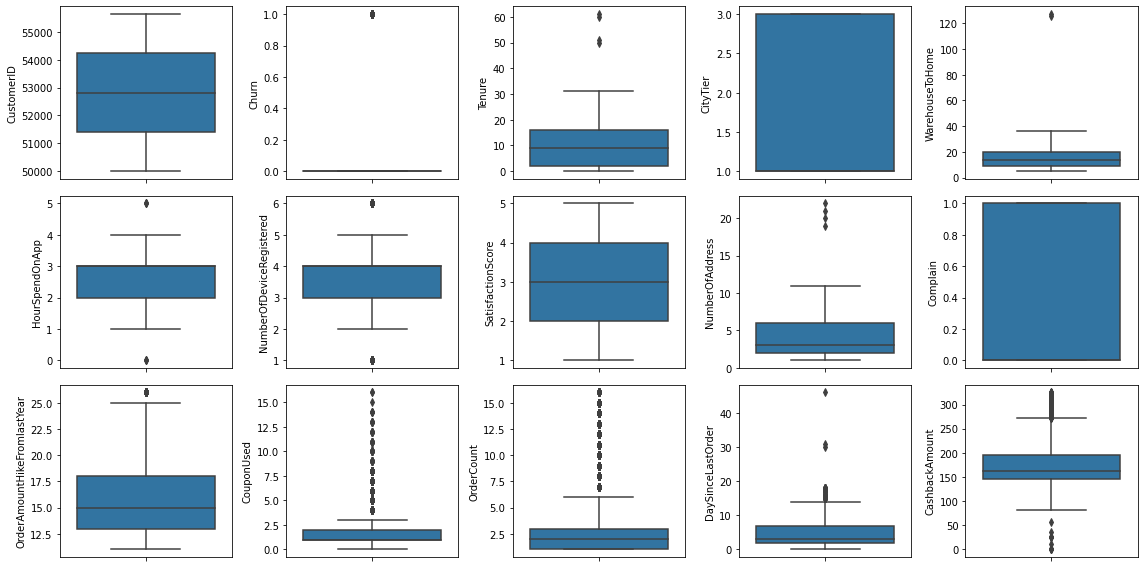

In [30]:
plt.figure(figsize = (16,8))
for i in range(len(num)):
    plt.subplot(3, round(len(num)/3), i+1)
    sns.boxplot(y = df[num[i]], orient = 'v')
    plt.tight_layout()

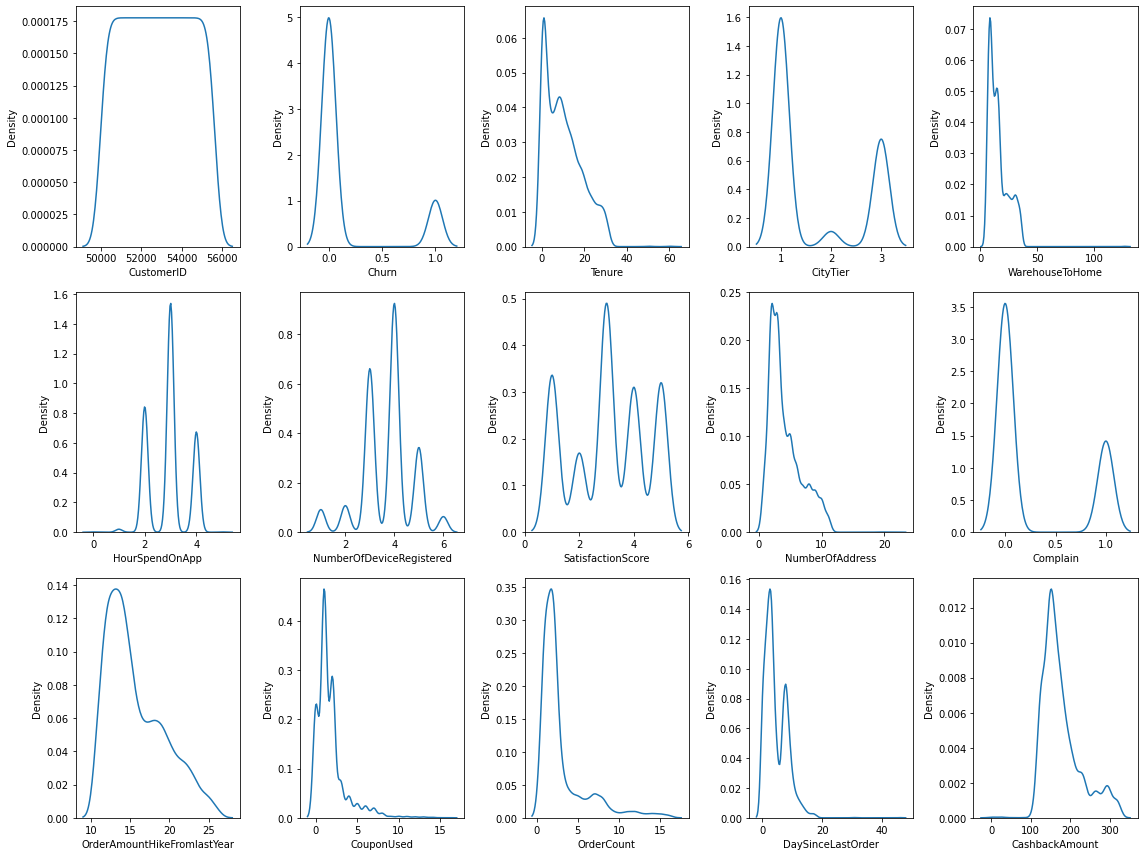

In [29]:
plt.figure(figsize = (16,12))
for i in range(len(num)):
    plt.subplot(3, round(len(num)/3), i+1)
    sns.kdeplot(x = df[num[i]])
    plt.tight_layout()

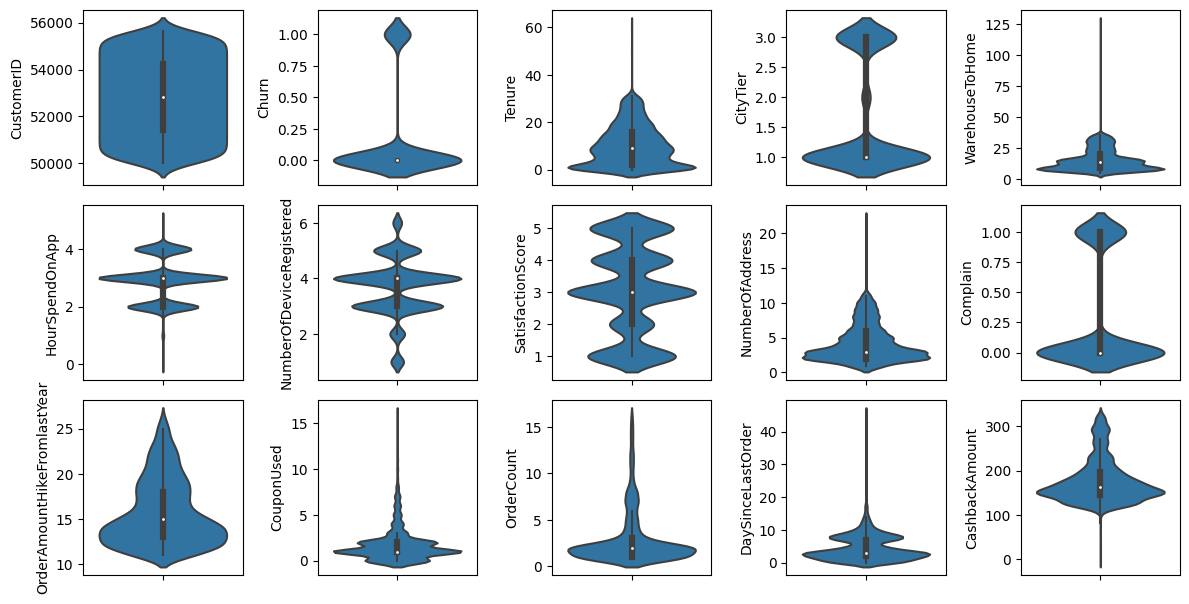

In [47]:
plt.figure(figsize = (12,6))
for i in range(len(num)):
    plt.subplot(3, round(len(num)/3), i+1)
    sns.violinplot(y = df[num[i]])
    plt.tight_layout()

In [34]:
num

['CustomerID',
 'Churn',
 'Tenure',
 'CityTier',
 'WarehouseToHome',
 'HourSpendOnApp',
 'NumberOfDeviceRegistered',
 'SatisfactionScore',
 'NumberOfAddress',
 'Complain',
 'OrderAmountHikeFromlastYear',
 'CouponUsed',
 'OrderCount',
 'DaySinceLastOrder',
 'CashbackAmount']

Dari Hasil observasi diatas kita dapat melihat beberapa hal menarik

1. Uniform distribution: CustomerID --> karena ini adalah ID dan sangat banyak value unique, maka kita akan drop pada saat preprocessing
2. Right-skewed: Tenure, WarehouseToHome, NumberOfAddress, OrderAmountHikeFromlastYear, CouponUsed, OrderCount, DaySinceLastOrder memiliki distribusi right skewed atau positively skewed, kita akan mentransformasi kolom ini dengan menggunakan log transformation
3. Left-skewed: CashbackAmount

karena ada beberapa column yang memiliki left-skewed distribution maka kita akan melakukan square transformation agar distribusi kolom-kolom tersebut akan mendekati normal. 

In [41]:
cat

['PreferredLoginDevice',
 'PreferredPaymentMode',
 'Gender',
 'PreferedOrderCat',
 'MaritalStatus']

In [70]:
df['CustomerID'].nunique()

5630

In [74]:
def group_df_uni(col):
    ndf = df.groupby(col).agg({'CustomerID':'nunique'}).reset_index()
    ndf['percentage'] = (ndf['CustomerID']/df['CustomerID'].nunique()) * 100
    return ndf

def plot_bar_uni(col):
    df1 = group_df_uni(col)
    fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (16,8))
    sns.barplot(x = col, y= 'CustomerID', data = df1, ax = ax[0], ci = None)
    ax[0].set_ylabel('Total Customer')
    show_val_int(ax[0])
    sns.barplot(x = col, y= 'percentage', data = df1, ax = ax[1], ci = None)
    show_val_percent(ax[1])

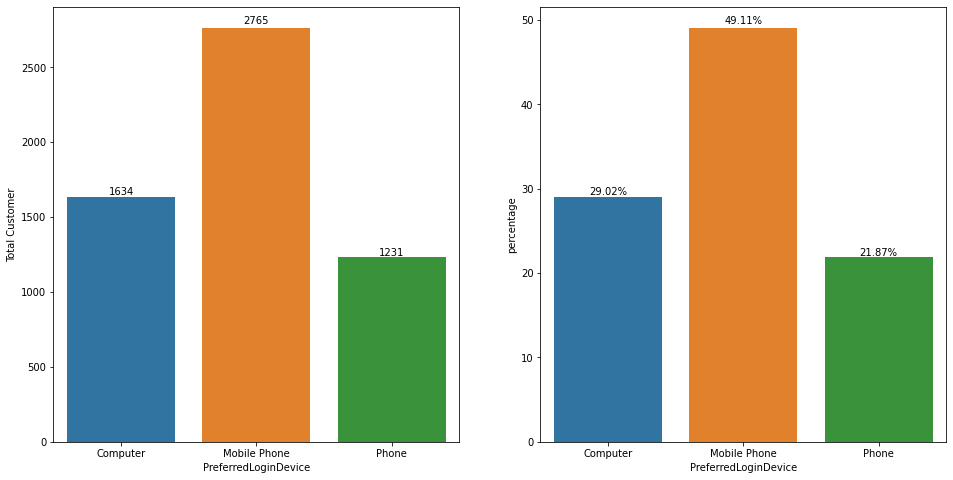

In [76]:
plot_bar_uni('PreferredLoginDevice')

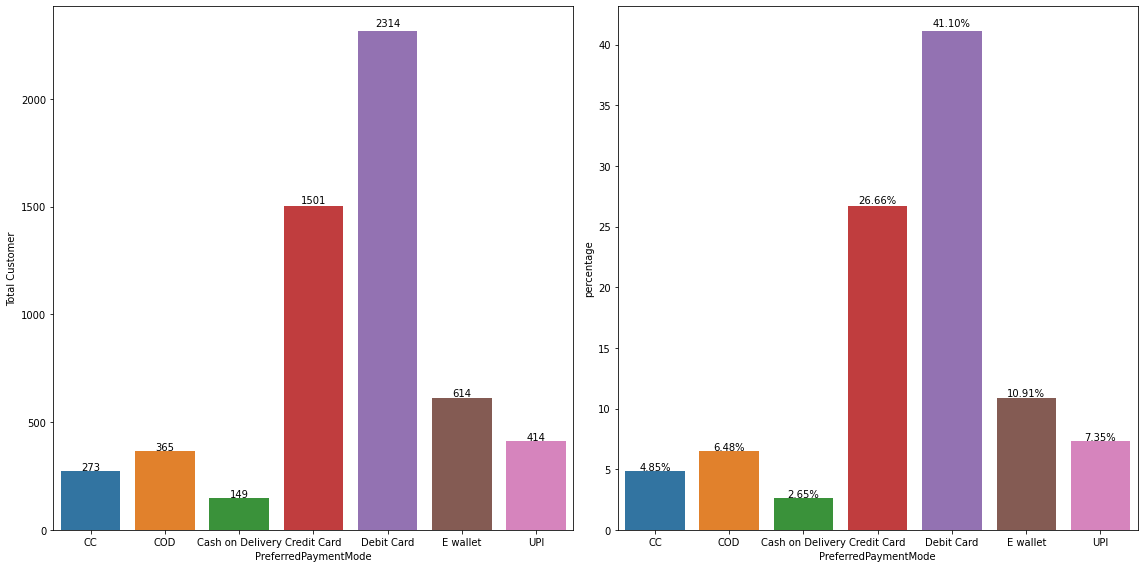

In [78]:
plot_bar_uni('PreferredPaymentMode')
plt.tight_layout()

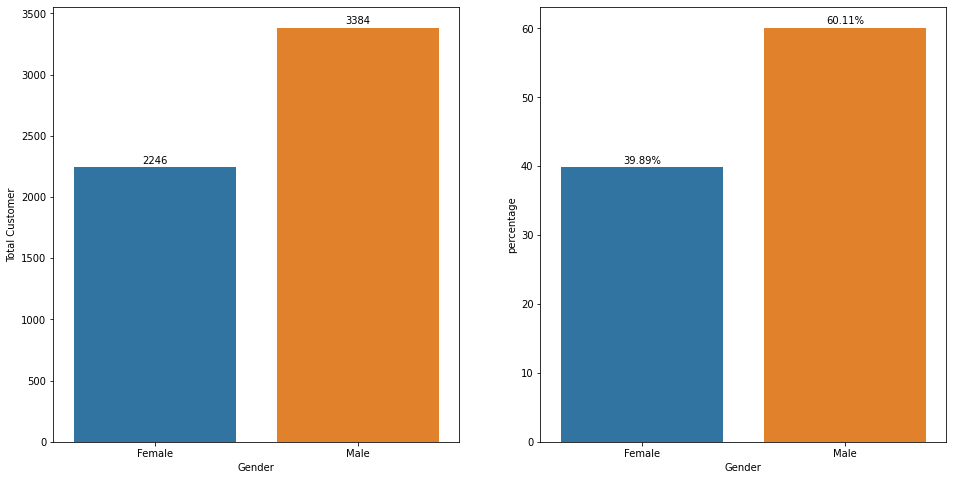

In [79]:
plot_bar_uni('Gender')

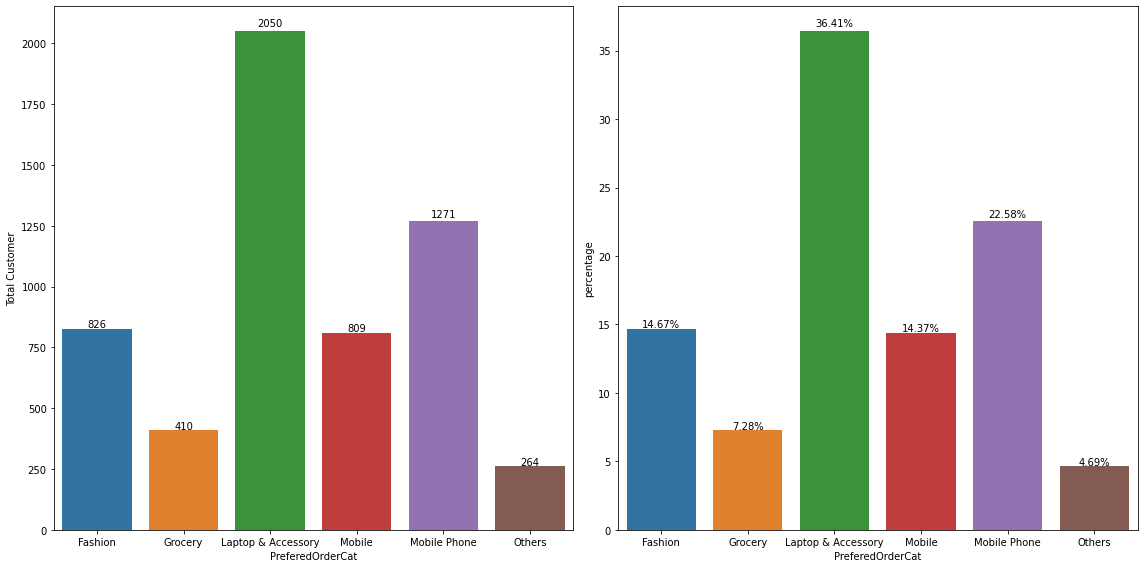

In [81]:
plot_bar_uni('PreferedOrderCat')
plt.tight_layout()

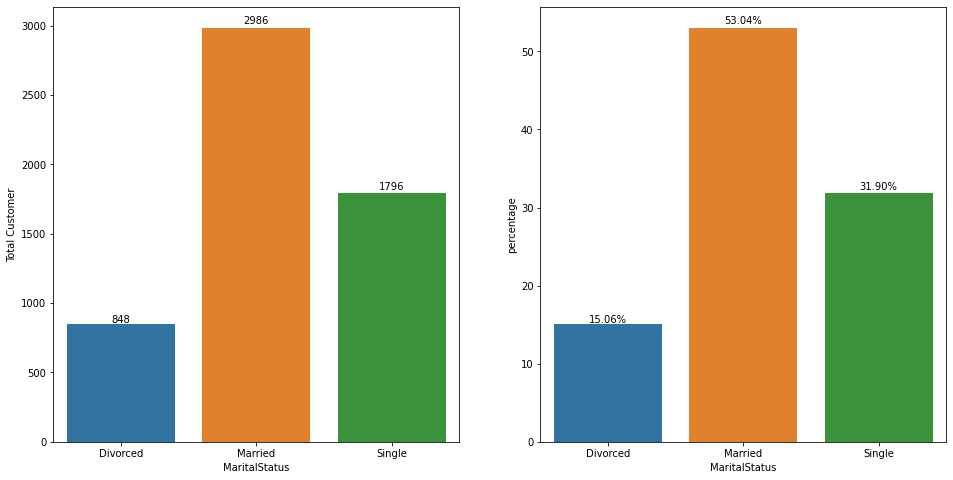

In [82]:
plot_bar_uni('MaritalStatus')

Pada PreferredPaymentMode terlihat credit card dan debit card sangat mendominasi. pada PreferedOrderCat juga terlihat bahwa ada 1 value yang mendominasi. Namun, karena dominasi tidak terlalu ekstrim, maka tidak perlu dilakukan preprocess pada data.

## Multivariate Analysis

In [11]:
def show_val(ax):
    for b in ax.patches:
        x = b.get_x() + (b.get_width() / 2)
        y = b.get_y() + b.get_height() + (b.get_height() * 0.01)
        val = b.get_height()
        ax.text(x, y, val, ha = 'center')
        
def show_val_percent(ax):
    for b in ax.patches:
        x = b.get_x() + (b.get_width() / 2)
        y = b.get_y() + b.get_height() + (b.get_height() * 0.01)
        val = f'{b.get_height():.2f}%'
        ax.text(x, y, val, ha = 'center')
        
def show_val_int(ax):
    for b in ax.patches:
        x = b.get_x() + (b.get_width() / 2)
        y = b.get_y() + b.get_height() + (b.get_height() * 0.01)
        val = int(b.get_height())
        ax.text(x, y, val, ha = 'center')

In [16]:
df['PreferredLoginDevice'].value_counts()

Mobile Phone    2765
Computer        1634
Phone           1231
Name: PreferredLoginDevice, dtype: int64

In [12]:
def group_df_churn(col):
    ndf = df.groupby([col, 'Churn']).agg({'CustomerID':'nunique'}).reset_index()
    ndf_sum = ndf.groupby(col).agg({'CustomerID':'sum'})
    ndf = ndf.merge(ndf_sum, on = col)
    ndf['percentage'] = (ndf['CustomerID_x']/ndf['CustomerID_y']) * 100
    return ndf

def plot_box(col):
    df1 = group_df_churn(col)
    fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (16,8))
    sns.barplot(x = col, y= 'CustomerID_x', hue = 'Churn', data = df1, ax = ax[0])
    ax[0].set_ylabel('Total Customer')
    show_val_int(ax[0])
    sns.barplot(x = col, y= 'percentage', hue = 'Churn', data = df1, ax = ax[1])
    show_val_percent(ax[1])
    
def plot_continuous(col):
    fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (16,8))
    sns.boxplot(x = 'Churn', y = col, data = df, ax = ax[0])
    sns.histplot(x = col, hue = 'Churn', data = df, ax = ax[1])

## Categorical

### PreferredLoginDevice

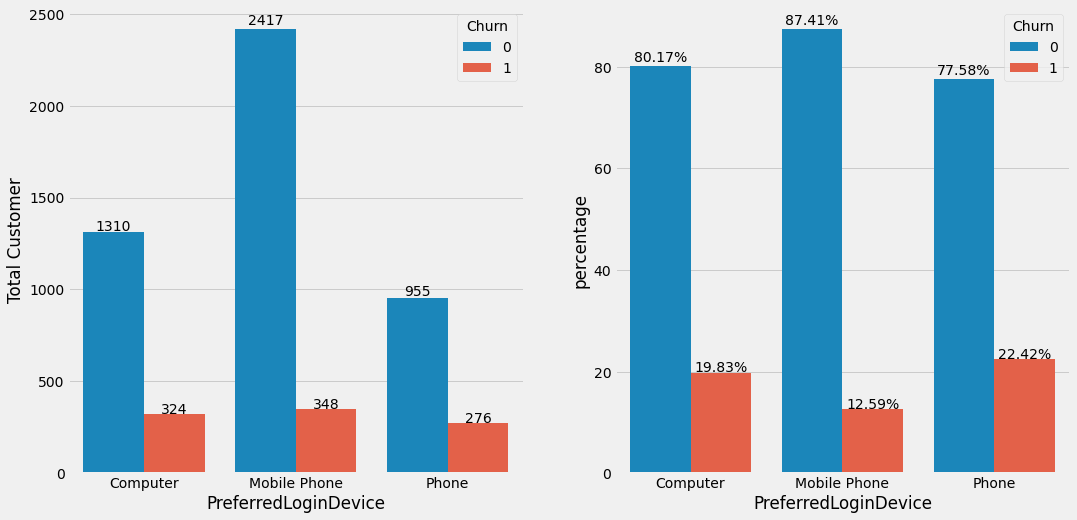

In [43]:
plot_box('PreferredLoginDevice')

### CityTier

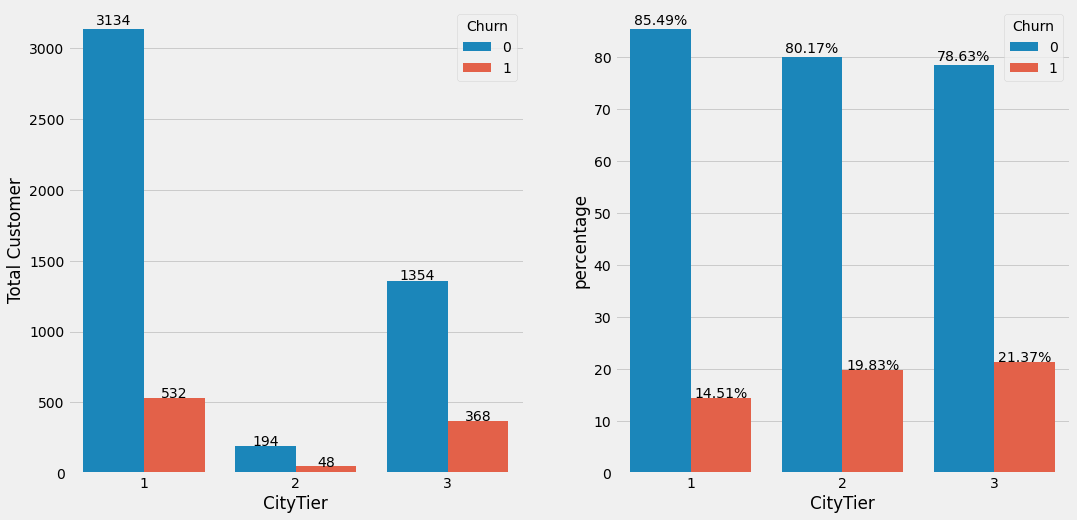

In [44]:
plot_box('CityTier')

### PreferredPaymentMode

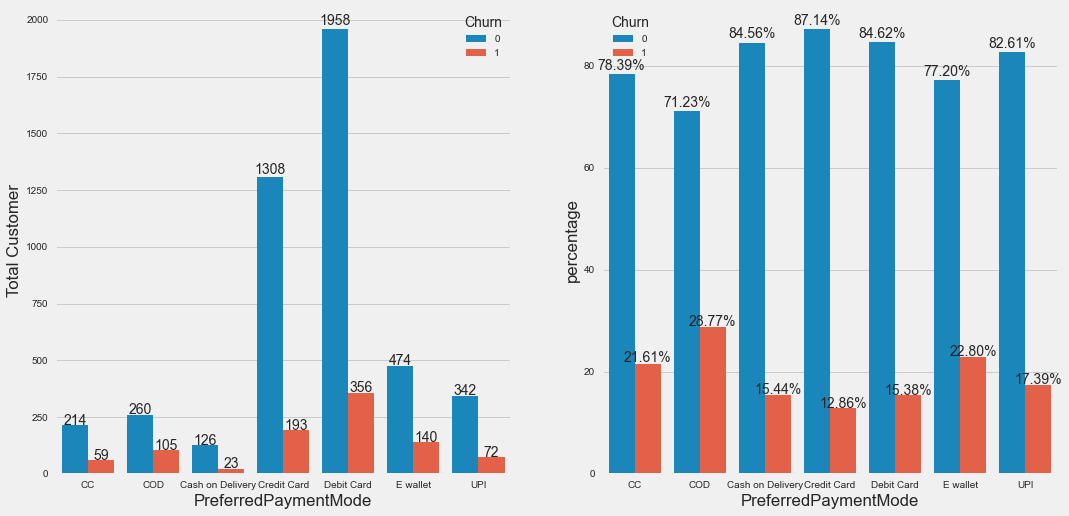

In [91]:
plot_box('PreferredPaymentMode')

### Gender

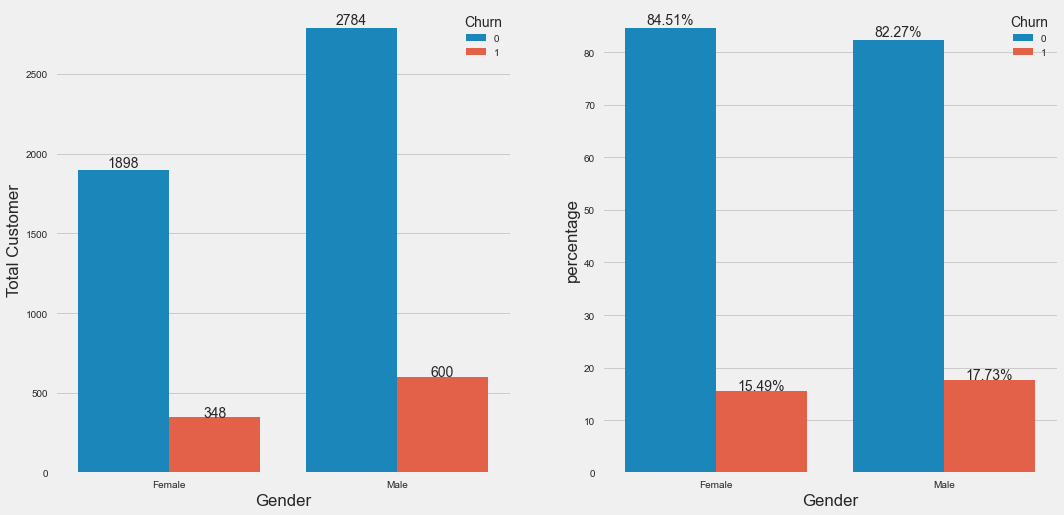

In [92]:
plot_box('Gender')

### PreferedOrderCat

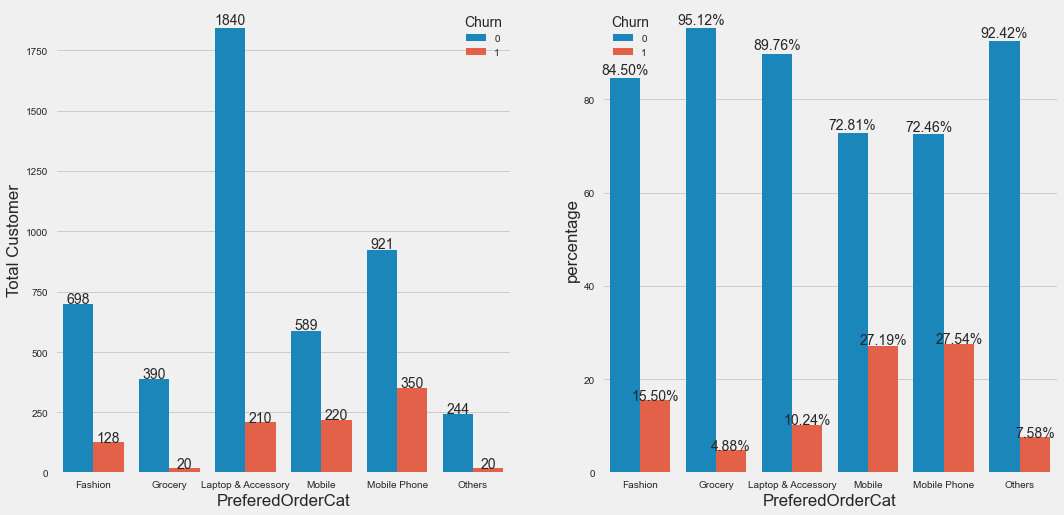

In [93]:
plot_box('PreferedOrderCat')

### SatisfactionScore

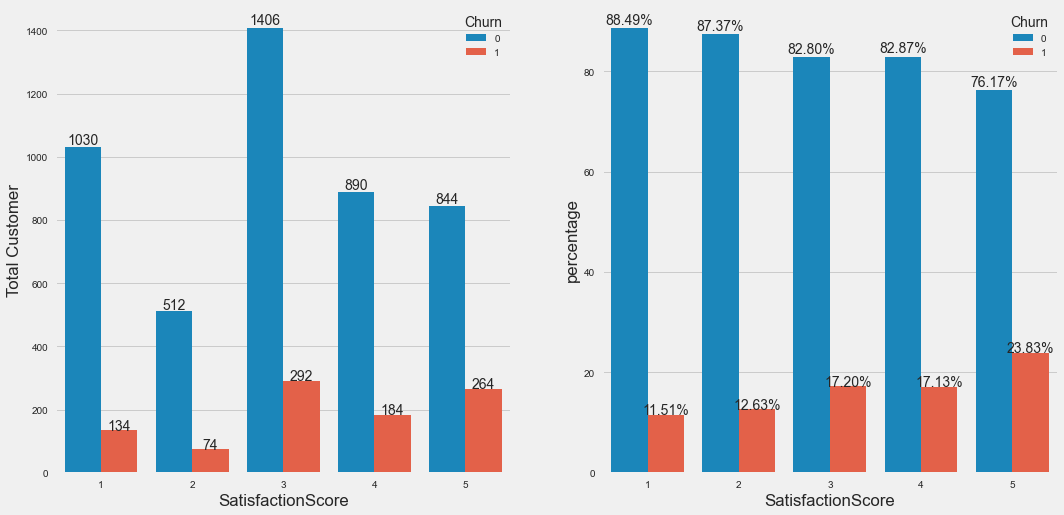

In [94]:
plot_box('SatisfactionScore')

### MaritalStatus

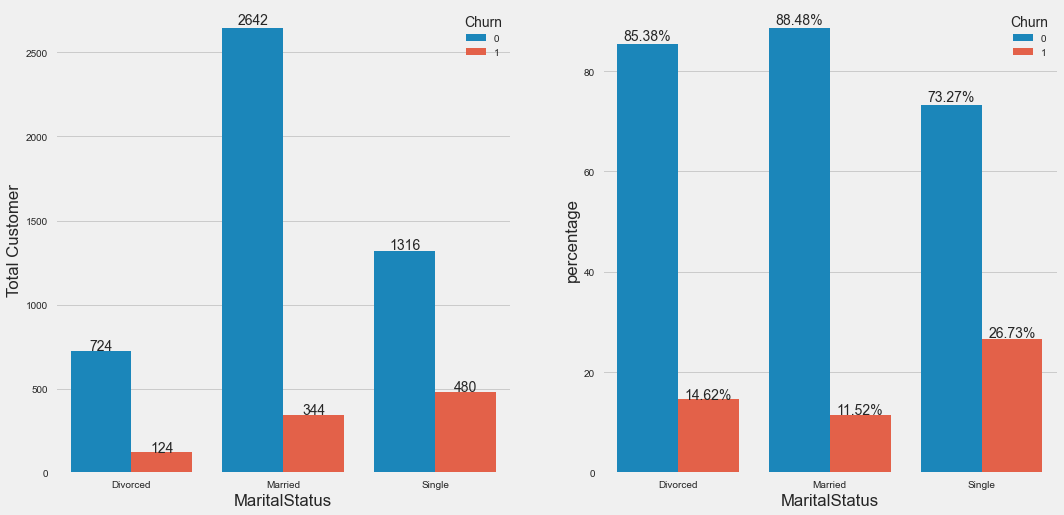

In [95]:
plot_box('MaritalStatus')

### Complain

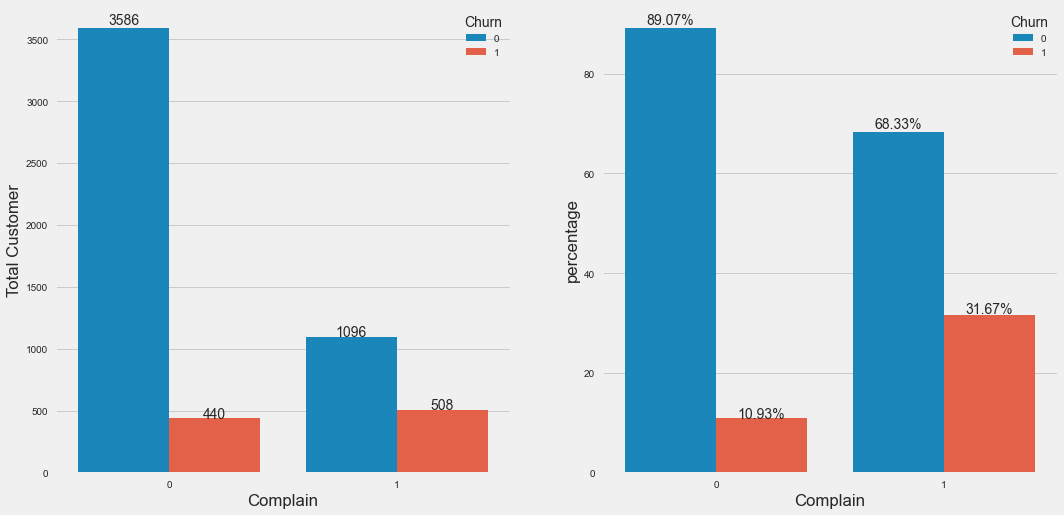

In [96]:
plot_box('Complain')

## Numerical Columns

### Tenure

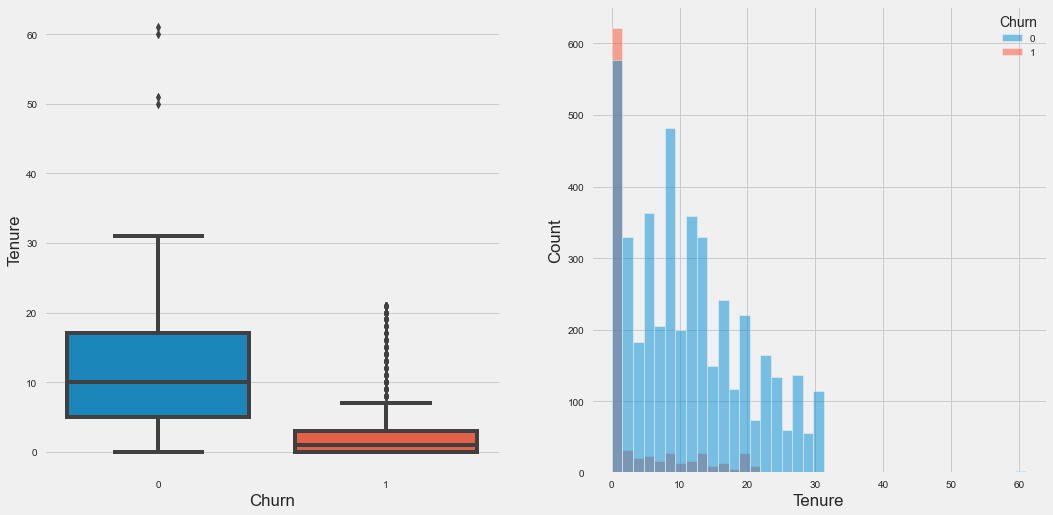

In [78]:
plot_continuous('Tenure')

### WarehouseToHome

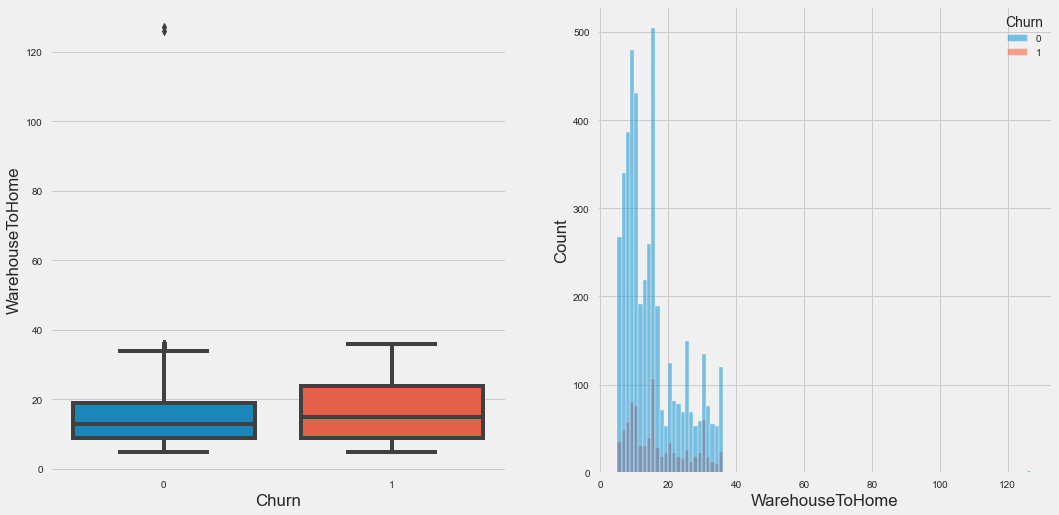

In [99]:
plot_continuous('WarehouseToHome')

### HourSpendOnApp

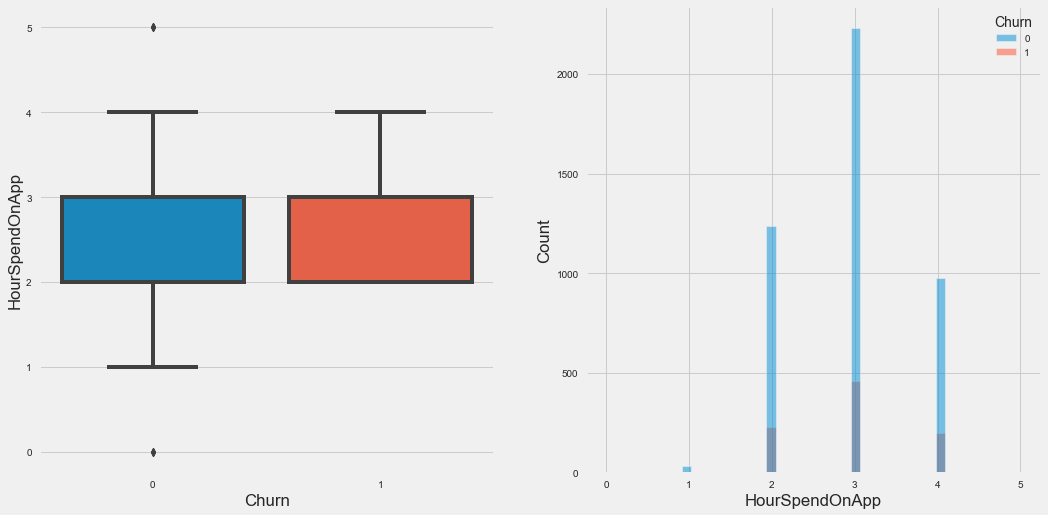

In [100]:
plot_continuous('HourSpendOnApp')

### NumberOfDeviceRegistered

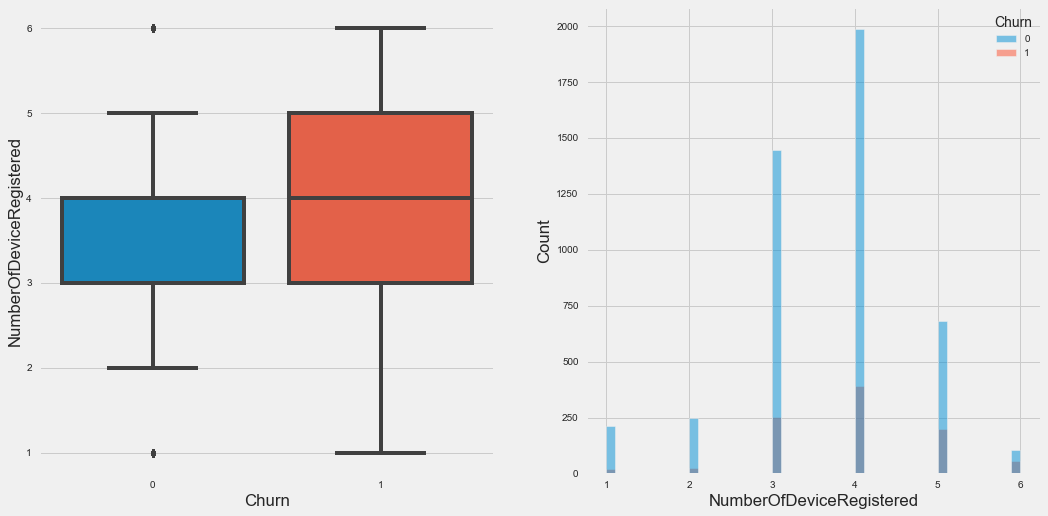

In [101]:
plot_continuous('NumberOfDeviceRegistered')

### NumberOfAddress

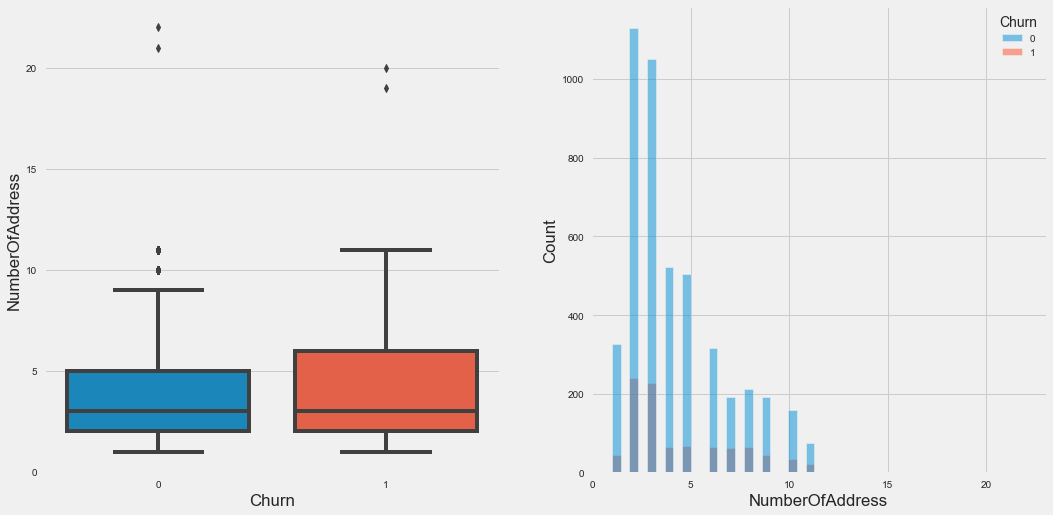

In [102]:
plot_continuous('NumberOfAddress')

### OrderAmountHikeFromlastYear

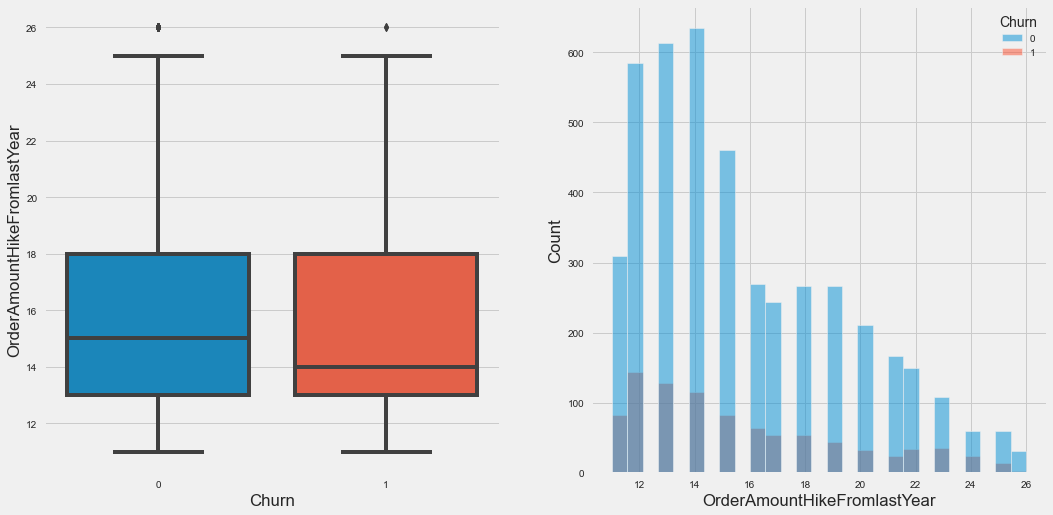

In [103]:
plot_continuous('OrderAmountHikeFromlastYear')

### CouponUsed

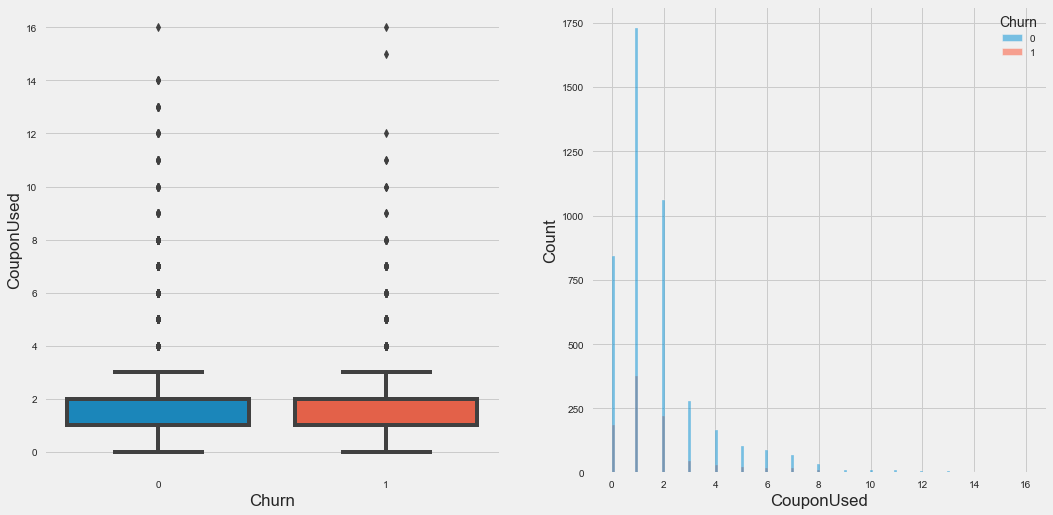

In [104]:
plot_continuous('CouponUsed')

### OrderAmountHikeFromlastYear

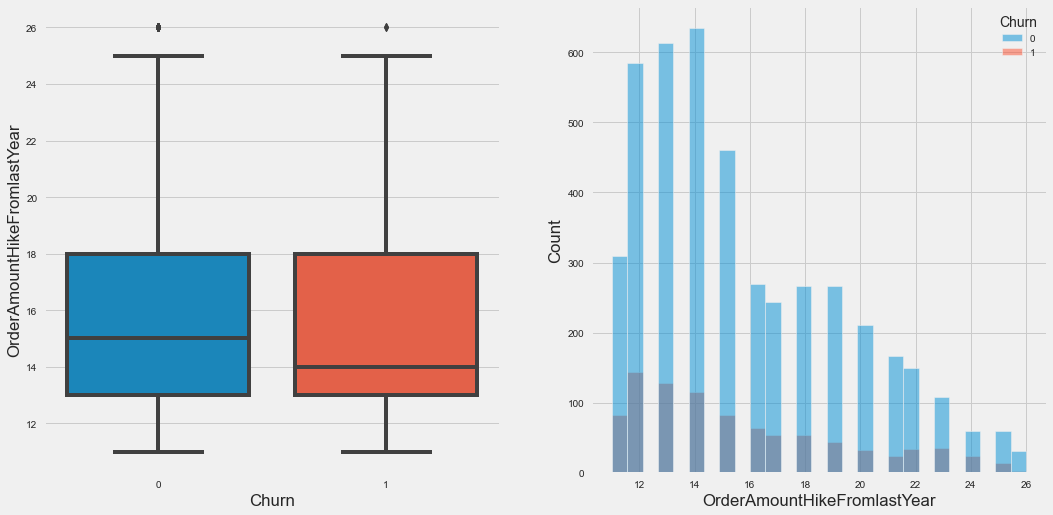

In [105]:
plot_continuous('OrderAmountHikeFromlastYear')

### OrderCount

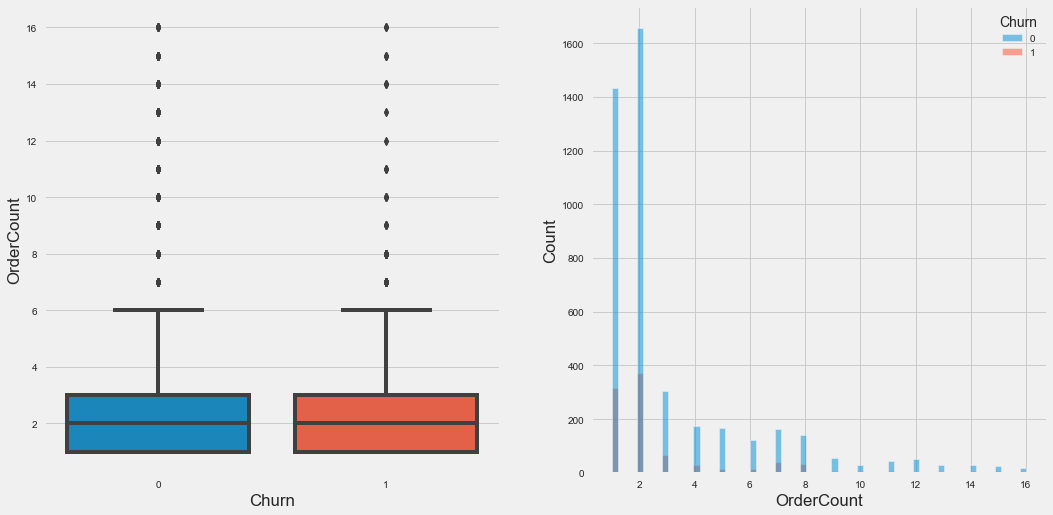

In [106]:
plot_continuous('OrderCount')

### DaySinceLastOrder

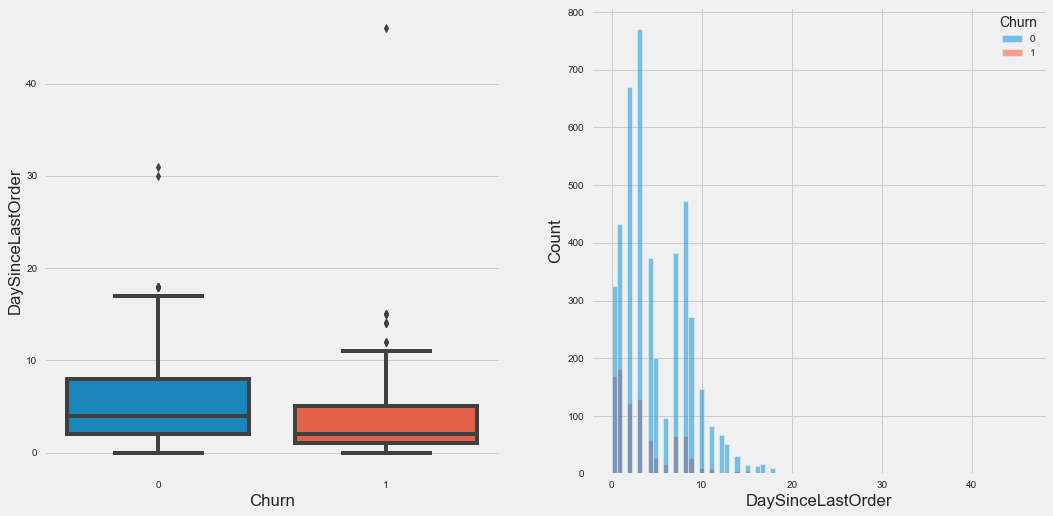

In [107]:
plot_continuous('DaySinceLastOrder')

### CashbackAmount

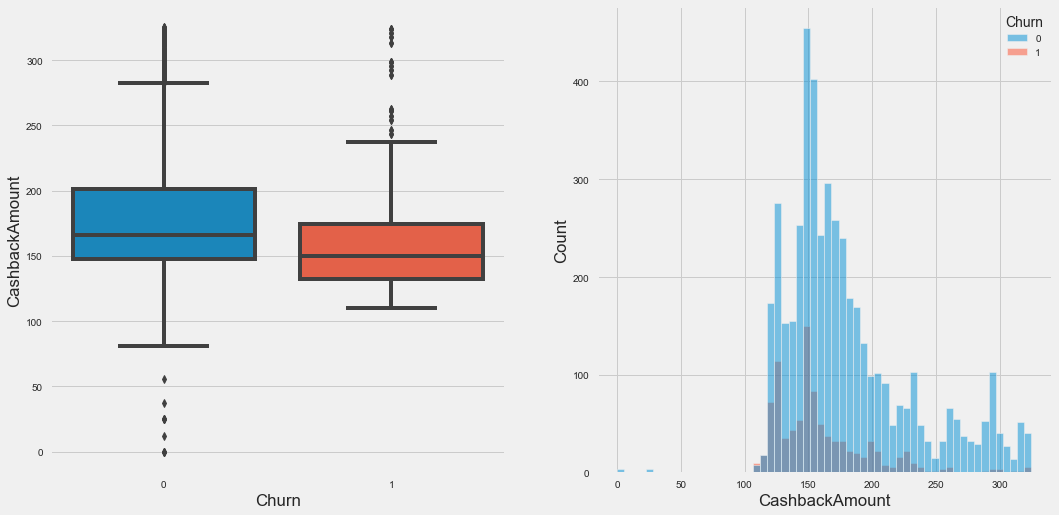

In [108]:
plot_continuous('CashbackAmount')

In [55]:
sns.heatmap?

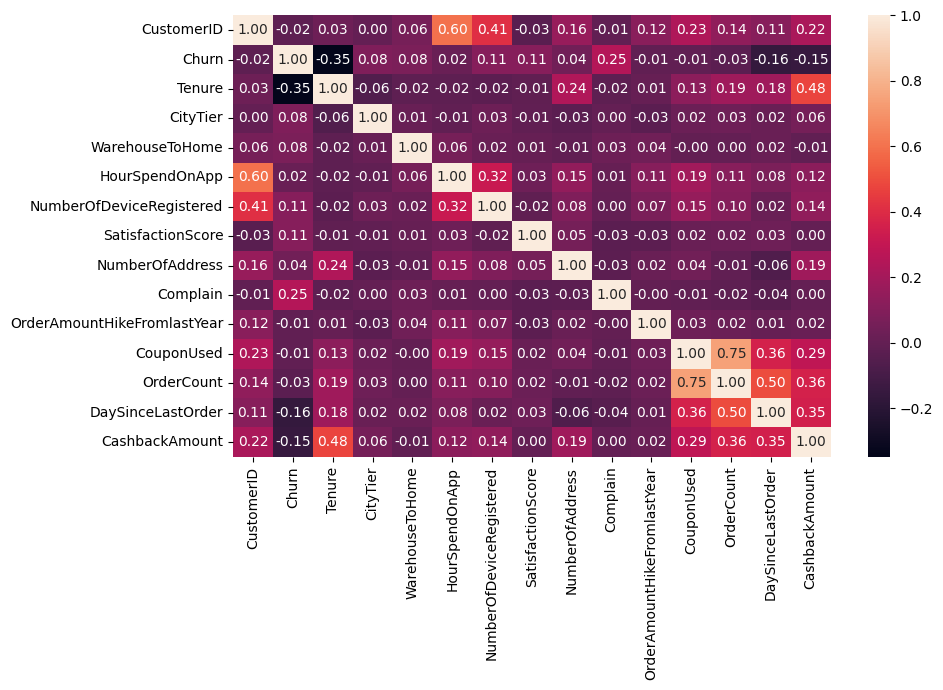

In [60]:
plt.figure(figsize = (10,7))
sns.heatmap(df.corr(), annot = True, fmt = '.2f')
plt.tight_layout()
plt.savefig('heatmap.png')

Dari heatmap diatas, kita dapat melihat fitur-fitur yang relevan untuk memprediksi customer churn. Feature-feature tersebut adalah:
1. Tenure
2. CityTier
3. WarehouseToHome
4. Complain
5. DaySinceLastOrder
6. CashbackAmount

Ada pula beberapa feature yang berkorelasi tinggi, sehingga dapat menimbulkan masalah multicolinearity. Feature-feature tersebut antara lain:

1. CouponUsed dengan OrderCount --> tidak bisa dipakai bersama-sama karena korelasi tinggi. Keduanya tidak dipakai karena korelasi mereka rendah terhadap target.

Dari fitur-fitur tersebut yang akan dipertahankan adalah
adalah:
1. Tenure
2. CityTier
3. WarehouseToHome
4. Complain
5. DaySinceLastOrder
6. CashbackAmount

In [88]:
cat

['PreferredLoginDevice',
 'PreferredPaymentMode',
 'Gender',
 'PreferedOrderCat',
 'MaritalStatus']

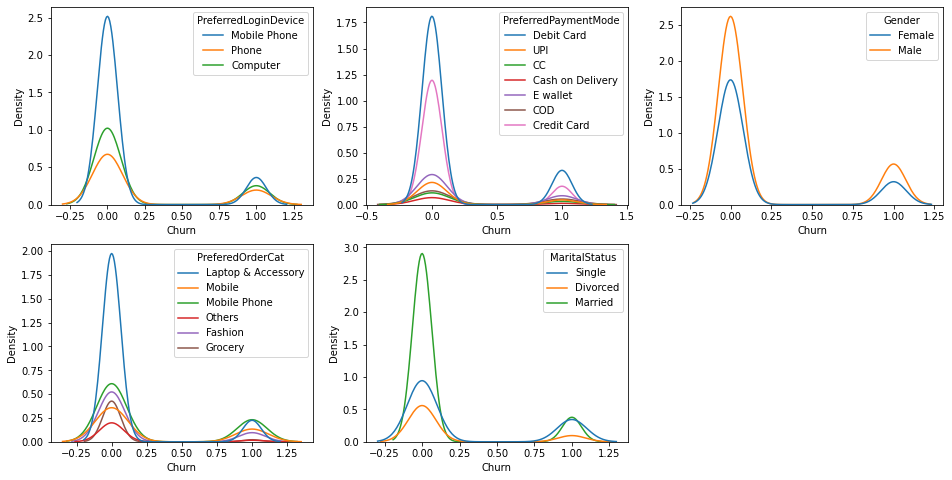

In [94]:
plt.figure(figsize = (16,8))
for i in range(len(cat)):
    plt.subplot(2, round(len(cat)/2)+1, i+1)
    sns.kdeplot(x = 'Churn', hue = cat[i], data = df)

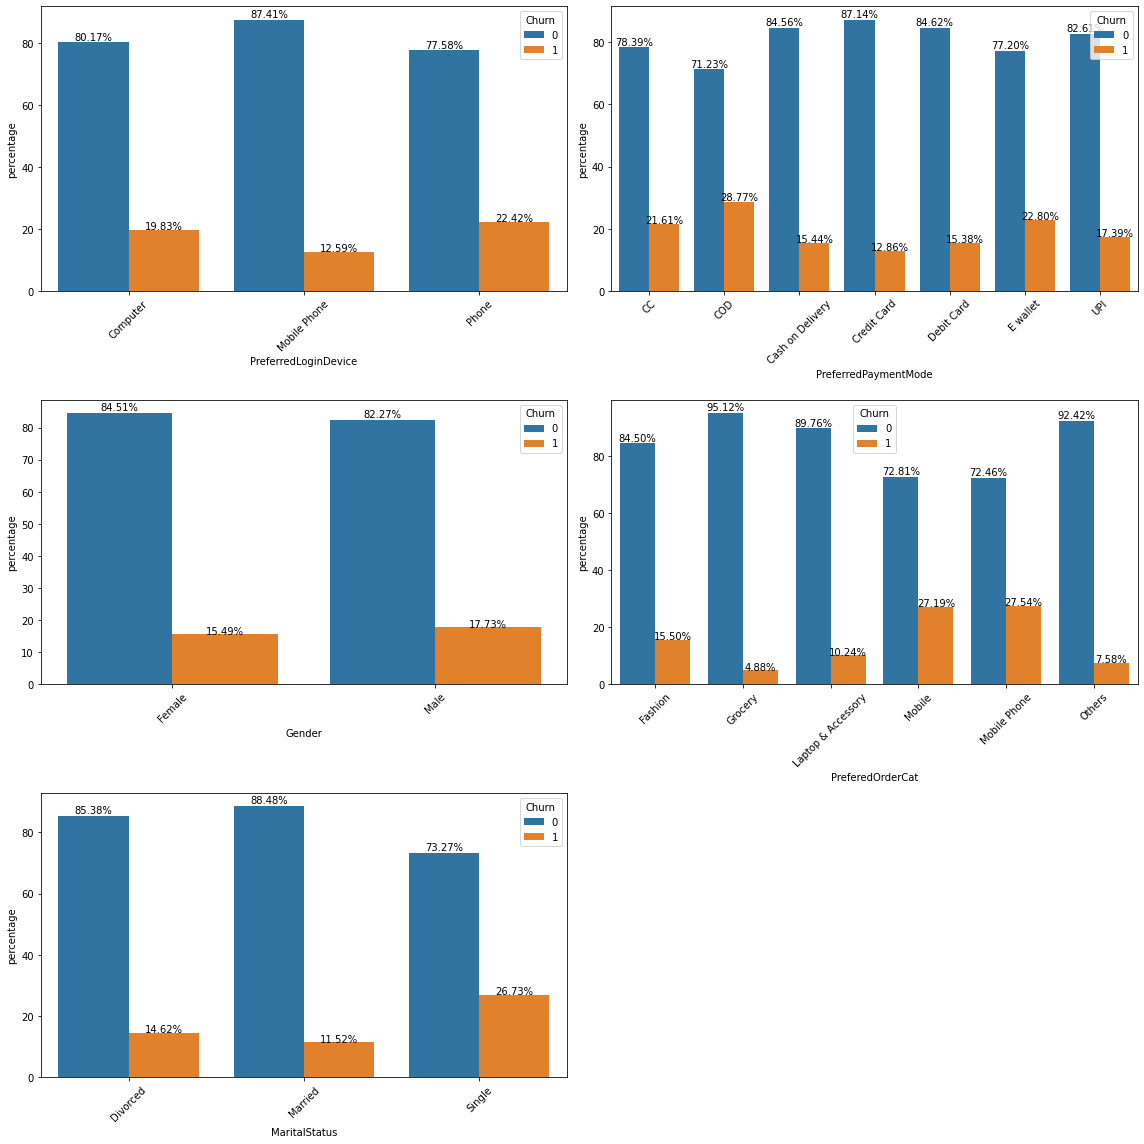

In [108]:
plt.figure(figsize = (16,16))
for i in range(len(cat)):
    plt.subplot(3, round(len(cat)/3), i+1)
    ax = sns.barplot(x = cat[i], y= 'percentage', hue = 'Churn', data = group_df_churn(cat[i]))
    show_val_percent(ax)
    plt.xticks(rotation=45)
    plt.tight_layout()

Dari plot untuk categorical data diatas kita juga dapat menarik kesimpulan, bahwa kolom-kolom categorical yang relevan dan harus dipertahankan adalah:
1. PreferredLoginDevice
2. PreferredPaymentMode
3. PreferedOrderCat
4. MaritalStatus

# Business Insight

In [9]:
df.columns

Index(['CustomerID', 'Churn', 'Tenure', 'PreferredLoginDevice', 'CityTier',
       'WarehouseToHome', 'PreferredPaymentMode', 'Gender', 'HourSpendOnApp',
       'NumberOfDeviceRegistered', 'PreferedOrderCat', 'SatisfactionScore',
       'MaritalStatus', 'NumberOfAddress', 'Complain',
       'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount',
       'DaySinceLastOrder', 'CashbackAmount'],
      dtype='object')

In [26]:
pembayaran_COD = df[df['PreferredPaymentMode'] == 'COD'].groupby(['PreferedOrderCat', 'Churn']).agg({'CustomerID':'nunique'}).reset_index()

In [27]:
pembayaran_COD

,PreferedOrderCat,Churn,CustomerID
0,Fashion,0,12
1,Fashion,1,2
2,Laptop & Accessory,0,118
3,Laptop & Accessory,1,13
4,Mobile,0,43
5,Mobile,1,38
6,Mobile Phone,0,87
7,Mobile Phone,1,52


In [28]:
df_single = df[df['MaritalStatus'] == 'Single']

In [29]:
df_Mobile_Phone = df[(df['PreferedOrderCat'] == 'Mobile') | (df['PreferedOrderCat'] == 'Mobile Phone')]

In [30]:
def group_df_churn_MP(col):
    ndf = df_Mobile_Phone.groupby([col, 'Churn']).agg({'CustomerID':'nunique'}).reset_index()
    ndf_sum = ndf.groupby(col).agg({'CustomerID':'sum'})
    ndf = ndf.merge(ndf_sum, on = col)
    ndf['percentage'] = (ndf['CustomerID_x']/ndf['CustomerID_y']) * 100
    return ndf

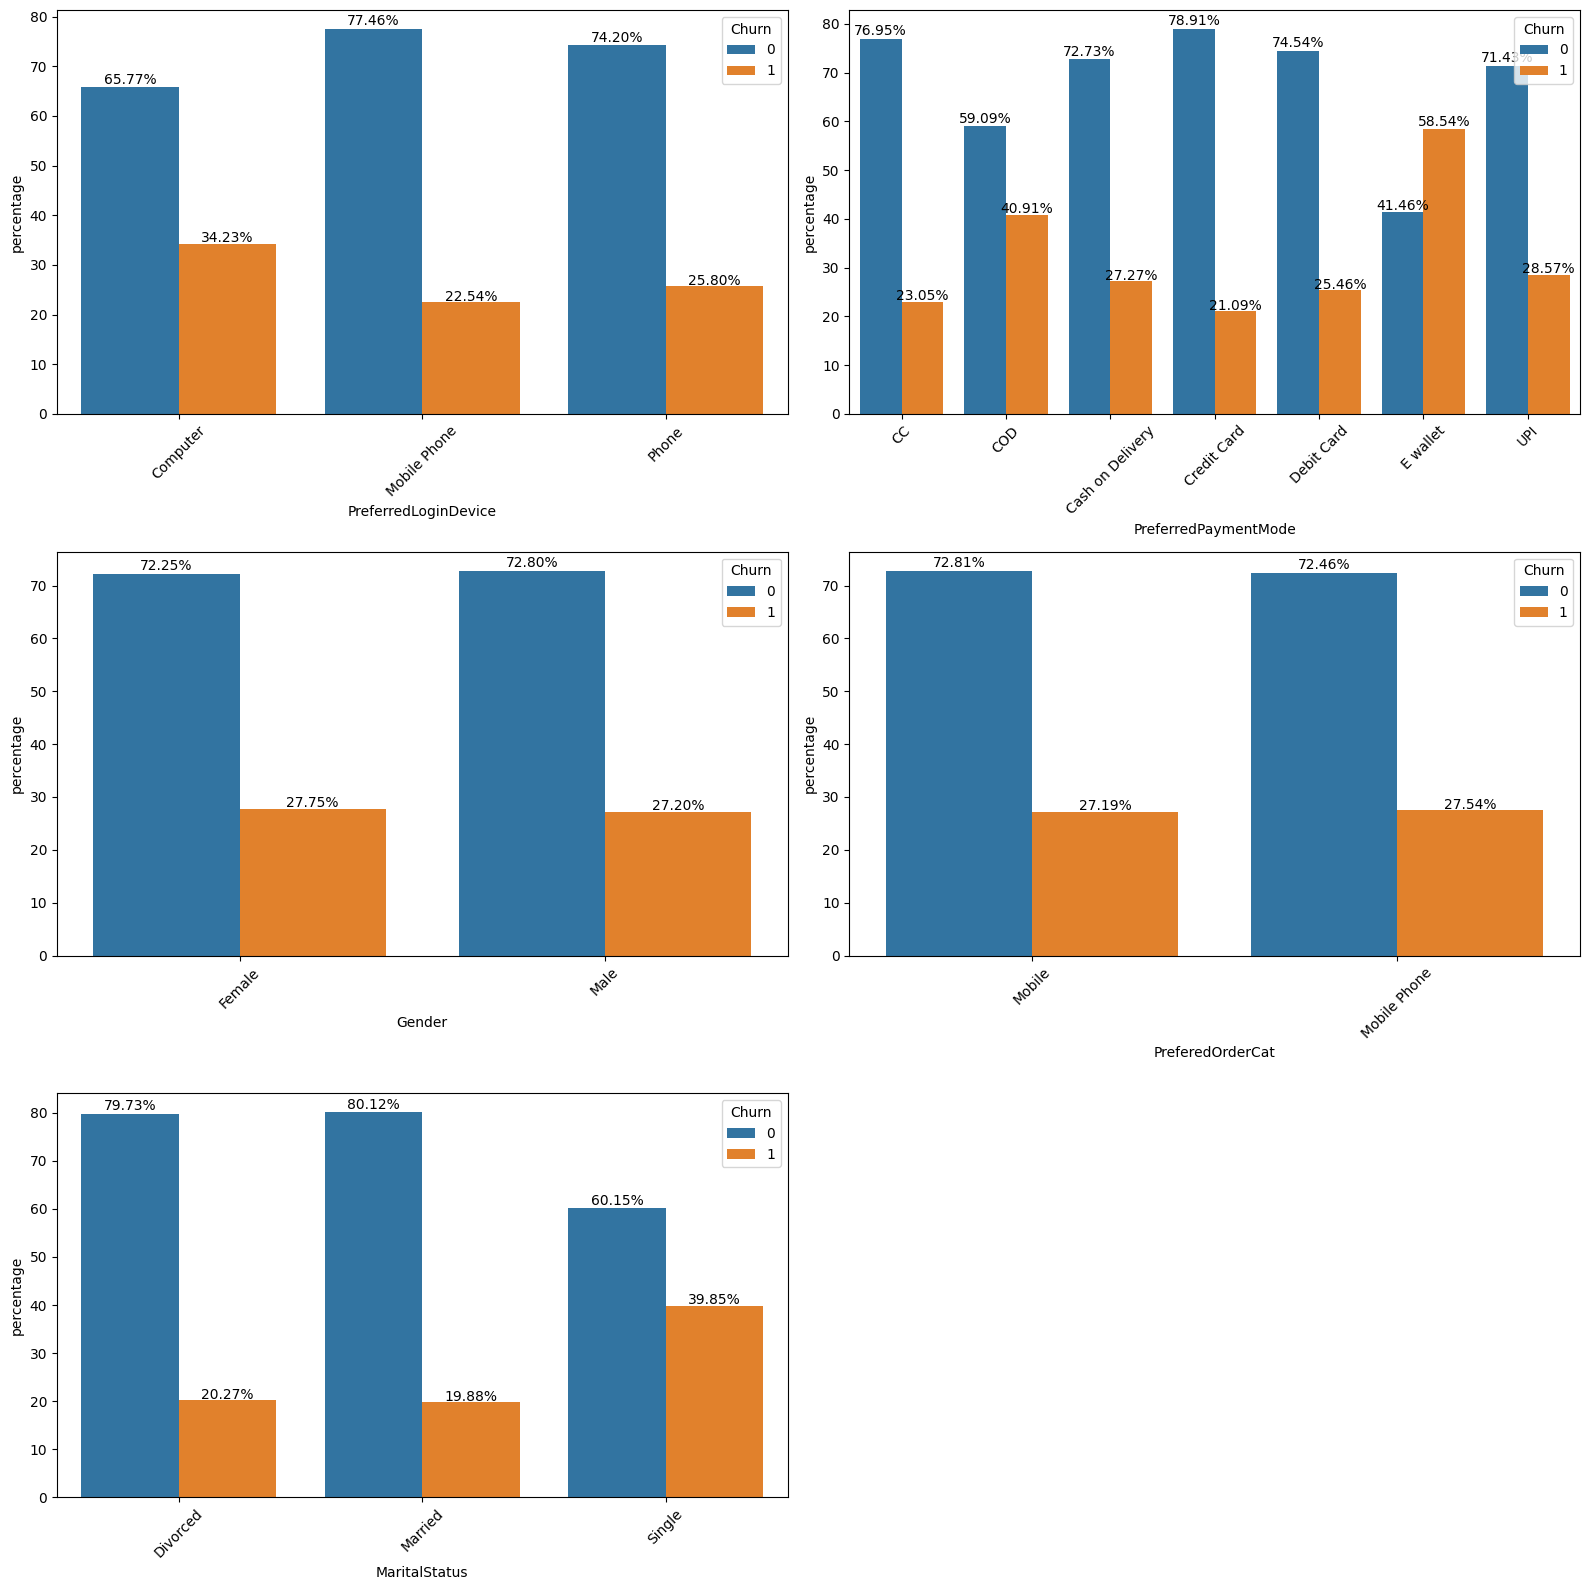

In [38]:
plt.figure(figsize = (16,16))
for i in range(len(cat)):
    plt.subplot(3, round(len(cat)/3), i+1)
    ax = sns.barplot(x = cat[i], y= 'percentage', hue = 'Churn', data = group_df_churn_MP(cat[i]))
    show_val_percent(ax)
    plt.xticks(rotation=45)
    plt.tight_layout()

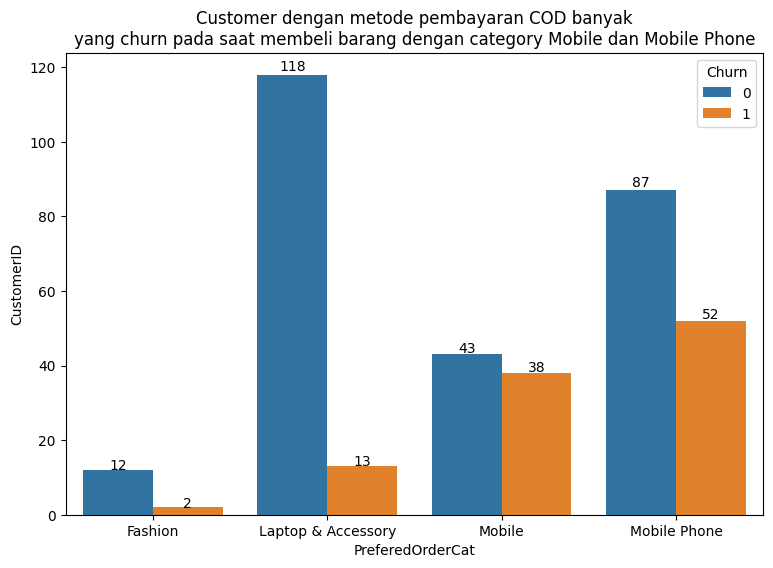

In [39]:
plt.figure(figsize = (9,6))
ax = sns.barplot(x = 'PreferedOrderCat', y = 'CustomerID', hue = 'Churn', data = pembayaran_COD)
show_val_int(ax)
plt.title('Customer dengan metode pembayaran COD banyak\nyang churn pada saat membeli barang dengan category Mobile dan Mobile Phone');

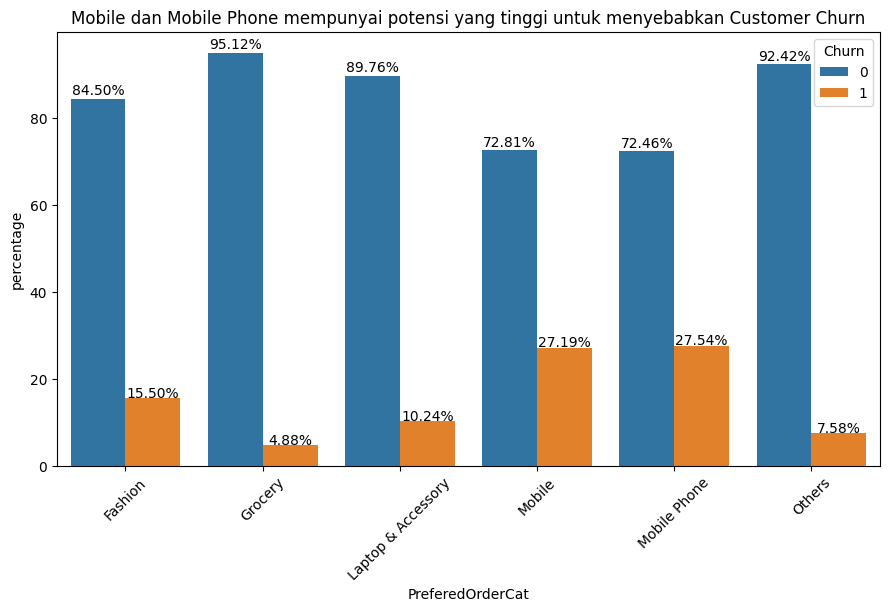

In [45]:
plt.figure(figsize = (9,6))
ax = sns.barplot(x = "PreferedOrderCat", y= 'percentage', hue = 'Churn', data = group_df_churn("PreferedOrderCat"))
show_val_percent(ax)
plt.xticks(rotation=45)
plt.tight_layout()
plt.title('Mobile dan Mobile Phone mempunyai potensi yang tinggi untuk menyebabkan Customer Churn');

In [10]:
df.DaySinceLastOrder.value_counts()

3.0     900
2.0     792
1.0     614
8.0     538
0.0     496
7.0     447
4.0     431
9.0     299
5.0     228
10.0    157
6.0     113
11.0     91
12.0     69
13.0     51
14.0     35
15.0     19
17.0     17
16.0     13
18.0     10
30.0      1
46.0      1
31.0      1
Name: DaySinceLastOrder, dtype: int64

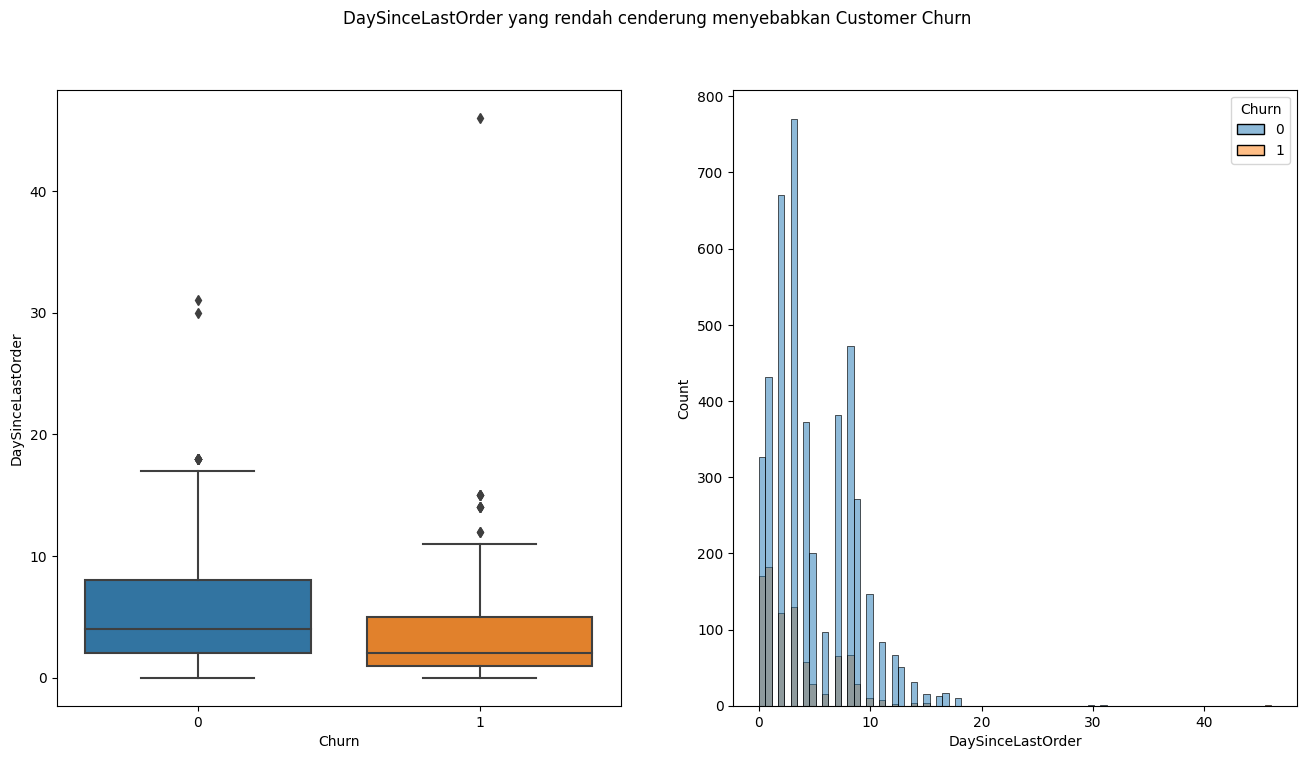

In [41]:
plot_continuous('DaySinceLastOrder')
plt.suptitle('DaySinceLastOrder yang rendah cenderung menyebabkan Customer Churn');

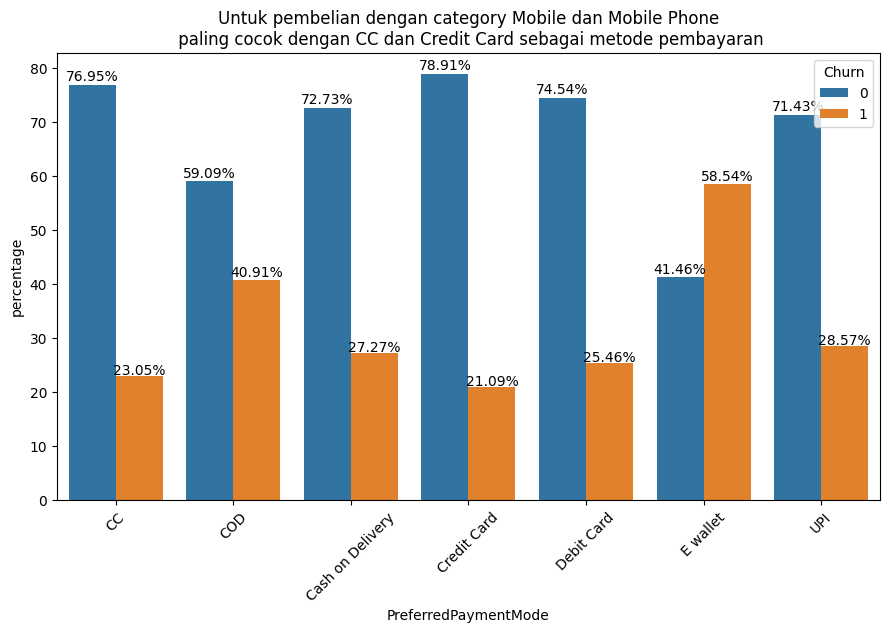

In [37]:
plt.figure(figsize = (9,6))
ax = sns.barplot(x = 'PreferredPaymentMode', y= 'percentage', hue = 'Churn', data = group_df_churn_MP('PreferredPaymentMode'))
show_val_percent(ax)
plt.xticks(rotation=45)
plt.tight_layout()
plt.title('Untuk pembelian dengan category Mobile dan Mobile Phone\n paling cocok dengan CC dan Credit Card sebagai metode pembayaran');

1. Customer dengan metode pembayaran COD banyak yang churn pada saat membeli barang dengan category Mobile dan Mobile Phone, Hal ini mungkin disebabkan oleh kurir COD yang kurang ramah dan berpengalaman sehingga menyebabkan barang menjadi cacat atau customer menjadi tidak puas terhadap pelayanannya. Oleh karena itu untuk pembelian barang dengan category Mobile dan Mobile Phone disarankan untuk menghilangkan metode pembayaran COD.


2. Mobile dan mobile phone memiliki potensi yang tinggi untuk menyebabkan customer churn. hal ini mungkin disebabkan karena kualitas barang dan juga mahalnya harga di Ecommerce tersebut, sehingga pelanggan pergi ke Ecommerce lain. Hal yang dapat dilakukan untuk mengatasi ini adalah memberikan pilihan untuk menggunakan asuransi/garansi serta memberikan kupon diskon untuk category Mobile dan Mobile Phone.


3. DaySinceLastOrder yang rendah cenderung menyebabkan customer churn. Hal ini mungkin dapat terjadi karena customer merasa terlalu sering berbelanja online, sehingga ia memutuskan untuk merubah kebiasaan itu dan akhirnya berhenti berbelanja sama sekali. Hal ini dapat kita atasi dengan memberikan voucher setiap beberapa waktu, dalam kasus ini setiap minggu. Dengan melakukan ini, customer akan cenderung menunggu setiap minggu untuk berbelanja, sehingga customer tidak terlalu sering berbelanja.


4. Untuk Pembelian dengan kategori Mobile dan MobilePhone kebanyakan customer yang membayar dengan CC dan Credit Card cenderung lebih jarang churn dibanding dengan metode pembayaran lainnya. Oleh karena itu, kita dapat memberikan promo untuk customer yang mau membeli produk dengan kategori Mobile dan MobilePhone dan membayar dengan CC dan Credit Card sehingga dapat mengurangi jumlah customer yang churn.